In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
housing_madrid = pd.read_csv("housing_madrid_cleaned.csv")
pd.set_option("display.max_columns", None)
housing_madrid.head()

,id,neighborhood,sq_m,rooms,bathrooms,floors,sq_m_allotment,floor,neighborhood_id,price,house_type_id,is_renewal_needed,built_year,has_ac,has_fitted_wardrobes,has_lift,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,has_green_zones,has_parking,parking_included,parking_price,orientation_north,orientation_west,orientation_south,orientation_east,house_type,district_id,district
0,21742,San Cristóbal,64.0,2,1,0,0.0,3,135,85000.0,1.0,False,1960,True,False,False,False,False,False,False,False,False,False,False,0.0,False,True,False,False,Apartment,21,Villaverde
1,21741,Los Ángeles,70.0,3,1,0,0.0,4,132,129900.0,1.0,True,1969,False,True,True,False,False,True,False,False,False,False,False,0.0,False,False,False,False,Apartment,21,Villaverde
2,21740,San Andrés,94.0,2,2,0,0.0,1,134,144247.0,1.0,False,1969,False,True,True,False,False,False,False,True,False,False,False,0.0,False,False,False,False,Apartment,21,Villaverde
3,21739,San Andrés,64.0,2,1,0,0.0,0,134,109900.0,1.0,False,1955,False,False,True,False,False,False,False,True,False,False,False,0.0,False,False,True,False,Apartment,21,Villaverde
4,21738,Los Rosales,108.0,2,2,0,0.0,4,133,260000.0,1.0,False,2003,True,True,True,False,True,False,False,True,True,True,True,0.0,True,True,True,True,Apartment,21,Villaverde


In [3]:
housing_madrid.columns

Index(['id', 'neighborhood', 'sq_m', 'rooms', 'bathrooms', 'floors',
       'sq_m_allotment', 'floor', 'neighborhood_id', 'price', 'house_type_id',
       'is_renewal_needed', 'built_year', 'has_ac', 'has_fitted_wardrobes',
       'has_lift', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony',
       'has_storage_room', 'has_green_zones', 'has_parking',
       'parking_included', 'parking_price', 'orientation_north',
       'orientation_west', 'orientation_south', 'orientation_east',
       'house_type', 'district_id', 'district'],
      dtype='object')

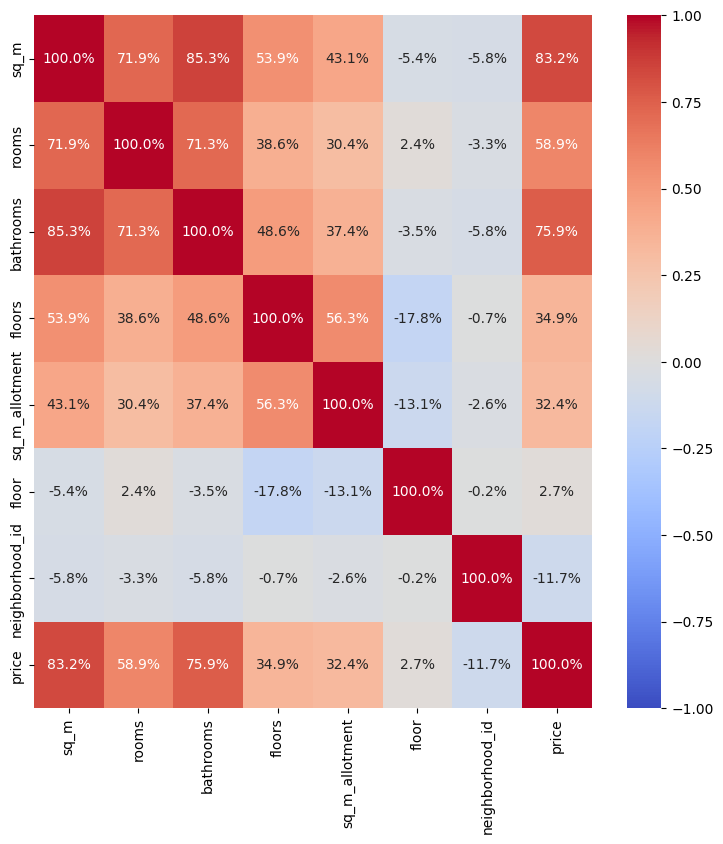

In [4]:
# Visialization

# Select  numerical columns
numerical_columns = ['sq_m', 'rooms', 'bathrooms', 'floors',
       'sq_m_allotment', 'floor', 'neighborhood_id', 'price']
numerical_df = housing_madrid[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(9,9))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, cmap='coolwarm', fmt='.1%');

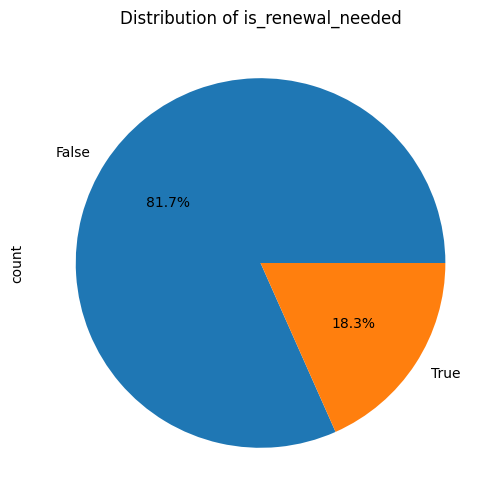

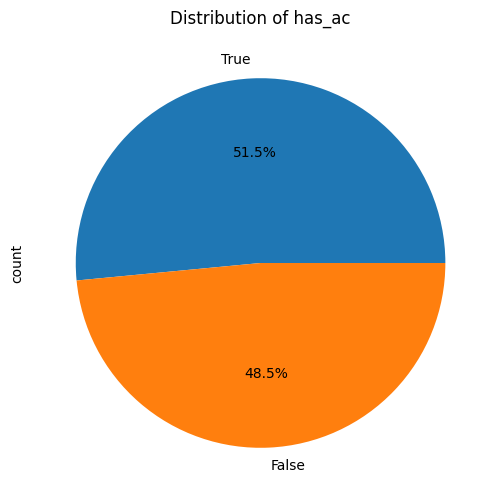

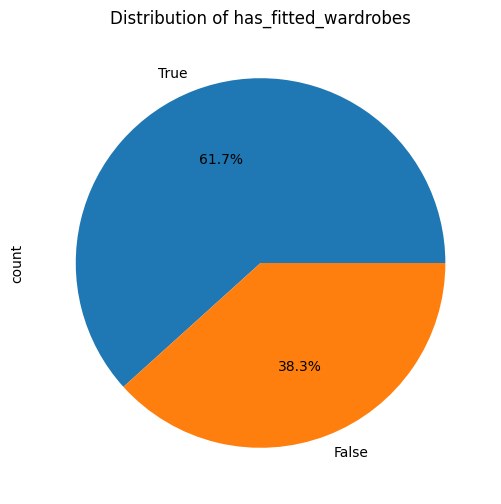

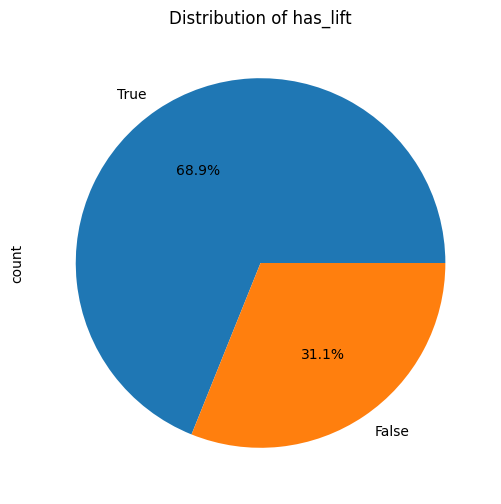

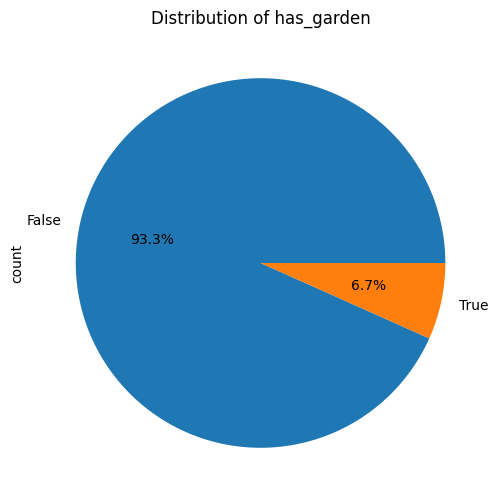

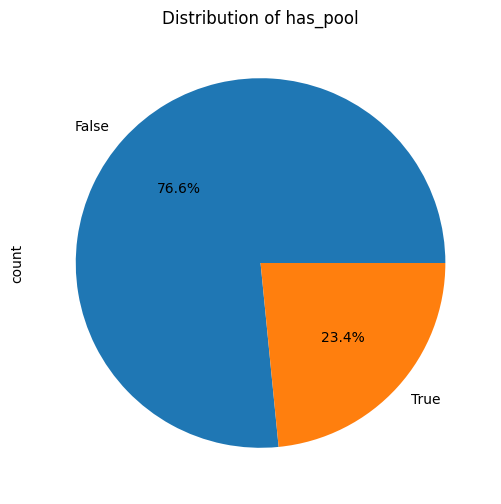

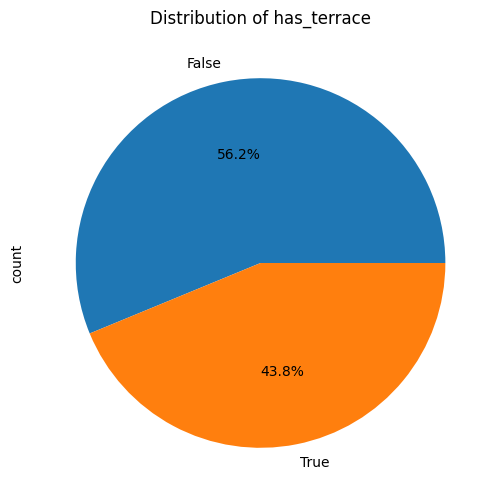

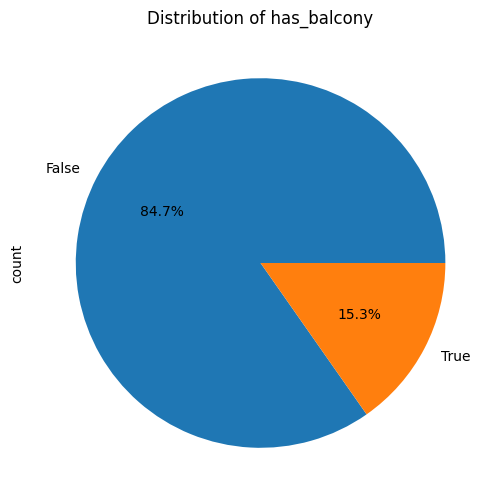

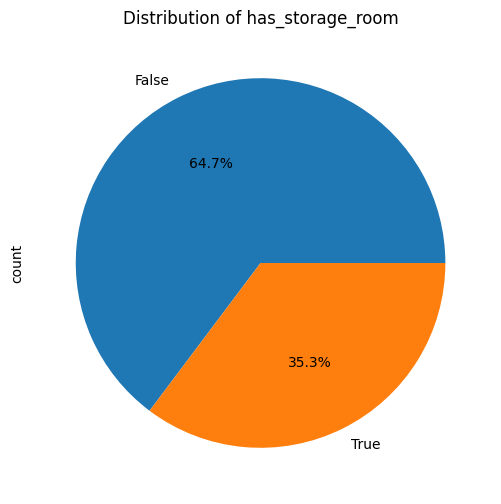

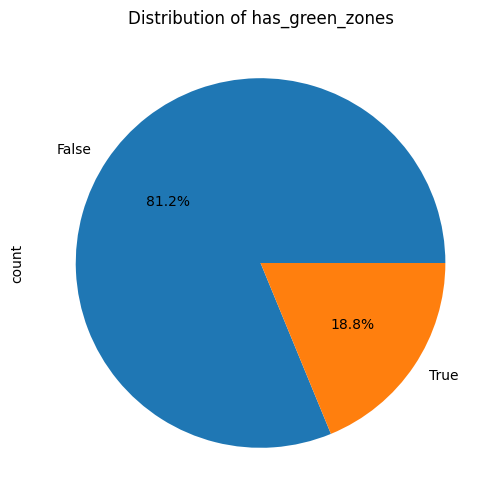

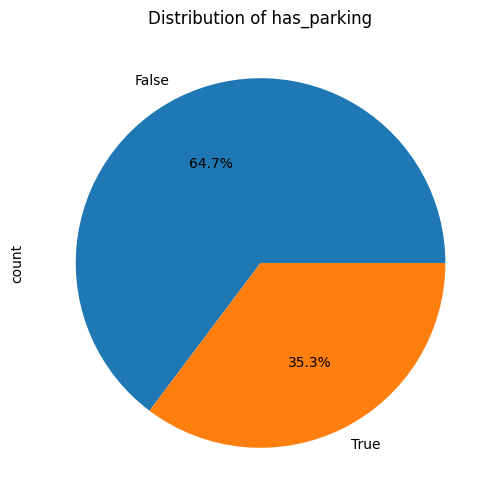

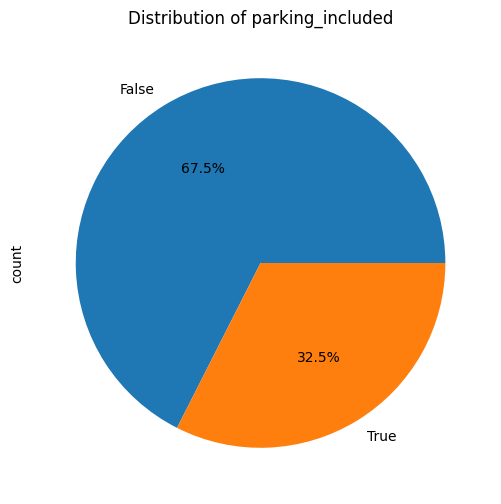

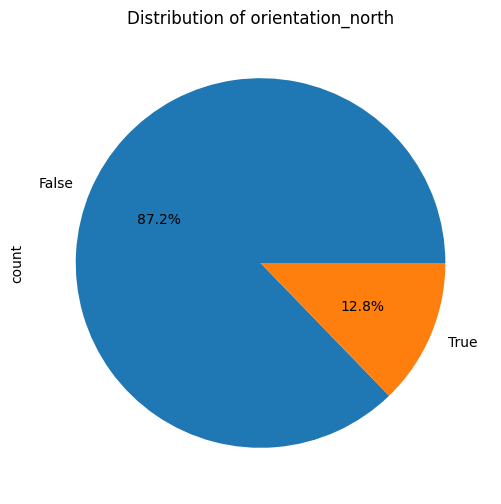

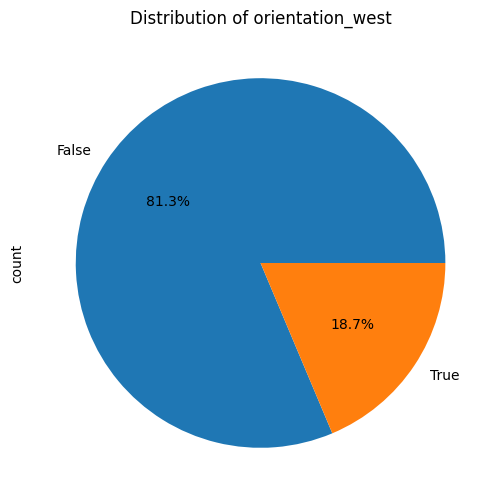

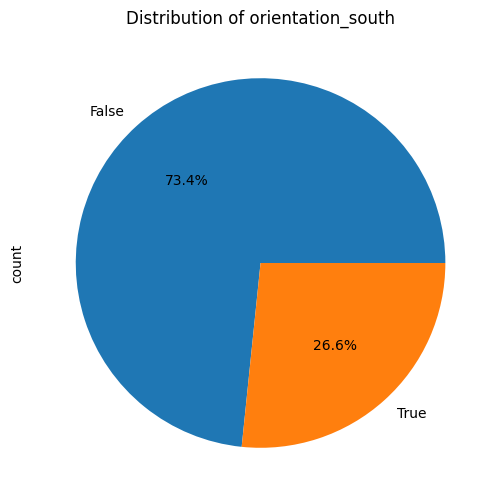

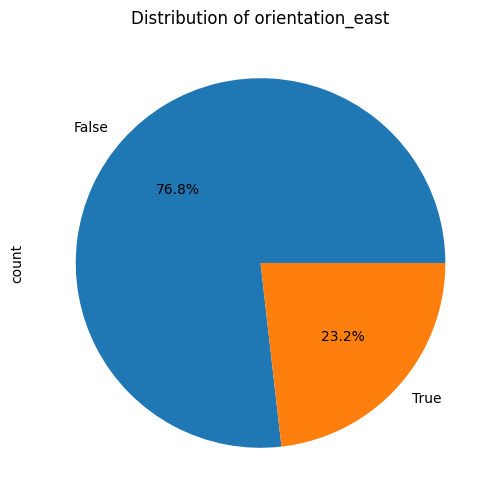

In [5]:
# Histograms

boolean_cols = ['is_renewal_needed', 'has_ac', 'has_fitted_wardrobes', 'has_lift', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room', 'has_green_zones', 'has_parking', 'parking_included', 'orientation_north', 'orientation_west', 'orientation_south', 'orientation_east']

for col in boolean_cols:
    plt.figure(figsize=(8, 6))
    housing_madrid[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.show()

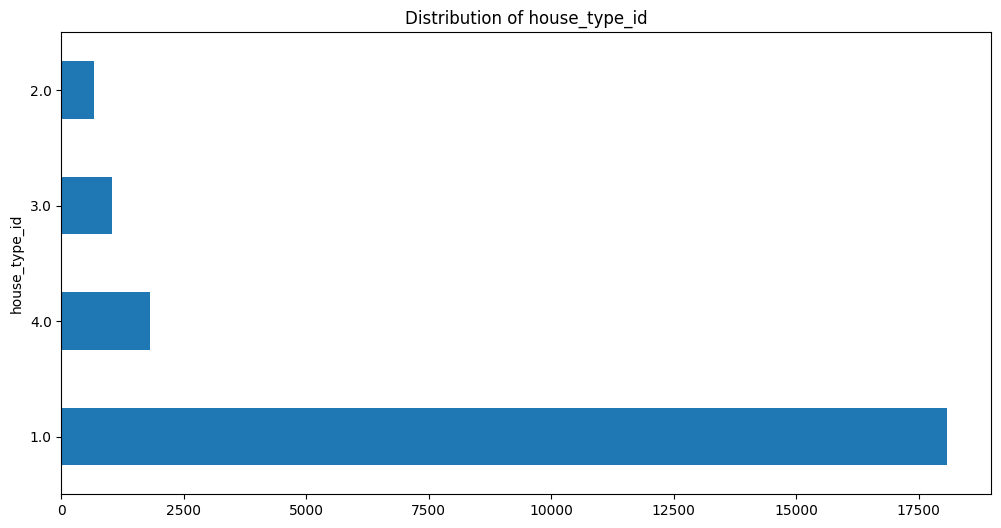

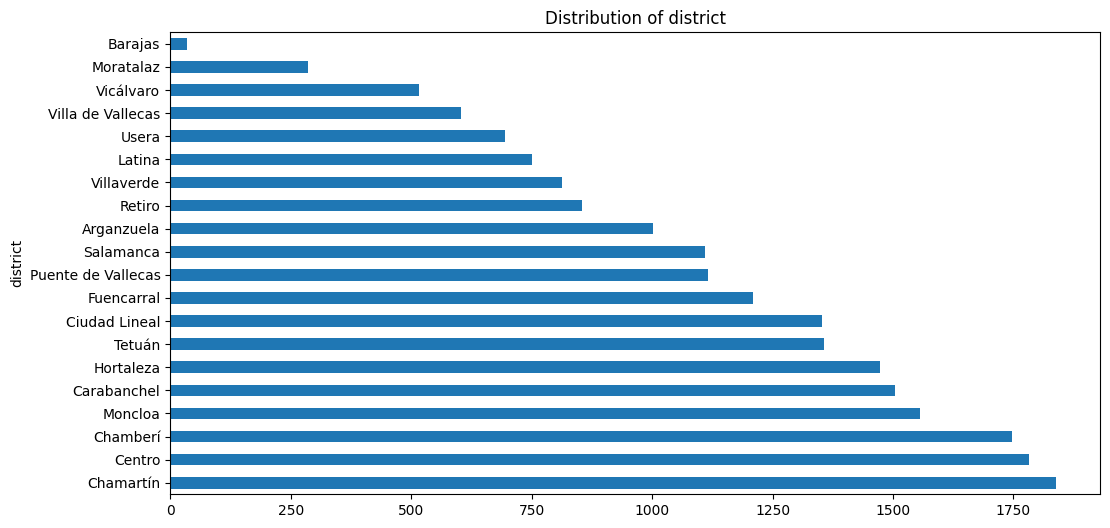


Value counts for house_type_id:
house_type_id
1.0    18083
4.0     1811
3.0     1031
2.0      675
Name: count, dtype: int64

Value counts for district:
district
Chamartín             1838
Centro                1782
Chamberí              1746
Moncloa               1556
Carabanchel           1505
Hortaleza             1473
Tetuán                1356
Ciudad Lineal         1352
Fuencarral            1209
Puente de Vallecas    1116
Salamanca             1109
Arganzuela            1002
Retiro                 855
Villaverde             814
Latina                 751
Usera                  695
Villa de Vallecas      604
Vicálvaro              516
Moratalaz              287
Barajas                 34
Name: count, dtype: int64


In [6]:
categorical_cols = ['house_type_id', 'district']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    housing_madrid[col].value_counts().plot(kind='barh')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=0)
    plt.show()

# Print value counts
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(housing_madrid[col].value_counts())